In [1]:
from typing import List
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pprint import pprint
from mmengine import load
from pycocotools.coco import COCO

from utils import boxes_xywh2xyxy, box_xywh2xyxy, box_xyxy2xywh

In [2]:
coco_ins_train = COCO('../../annotations/instances_train.json')
coco_rel_train = COCO('../../annotations/relations_train.json')
coco_ins_test = COCO('../../annotations/instances_test.json')
coco_rel_test = COCO('../../annotations/relations_test.json')

loading annotations into memory...
Done (t=0.75s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [3]:
ins_categories = coco_ins_train.cats
rel_categories = coco_rel_train.cats

In [4]:
label_info = load('../../configs/label_info.json')
ins_info = label_info['ins_info']

In [5]:
font = cv2.FONT_HERSHEY_SIMPLEX
train_img_root = '../../images/train/'
test_img_root = '../../images/test/'
ins_label2cat = {id: cat for id, cat in enumerate(coco_ins_train.getCatIds())}
ins_cat2label = {cat: id for id, cat in enumerate(coco_ins_train.getCatIds())}
palette = np.asarray([(220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
         (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
         (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30),
         (165, 42, 42), (255, 77, 255), (0, 226, 252), (182, 182, 255),
         (0, 82, 0), (120, 166, 157), (110, 76, 0), (174, 57, 255),
         (199, 100, 0), (72, 0, 118), (255, 179, 240), (0, 125, 92),
         (209, 0, 151), (188, 208, 182), (0, 220, 176), (255, 99, 164),
         (92, 0, 73), (133, 129, 255), (78, 180, 255), (0, 228, 0),
         (174, 255, 243), (45, 89, 255), (134, 134, 103), (145, 148, 174),
         (255, 208, 186), (197, 226, 255), (171, 134, 1), (109, 63, 54),
         (207, 138, 255), (151, 0, 95), (9, 80, 61), (84, 105, 51),
         (74, 65, 105), (166, 196, 102), (208, 195, 210), (255, 109, 65),
         (0, 143, 149), (179, 0, 194), (209, 99, 106), (5, 121, 0),
         (227, 255, 205), (147, 186, 208), (153, 69, 1), (3, 95, 161),
         (163, 255, 0), (119, 0, 170), (0, 182, 199), (0, 165, 120),
         (183, 130, 88), (95, 32, 0), (130, 114, 135), (110, 129, 133),
         (166, 74, 118), (219, 142, 185), (79, 210, 114), (178, 90, 62),
         (65, 70, 15), (127, 167, 115), (59, 105, 106), (142, 108, 45),
         (196, 172, 0), (95, 54, 80), (128, 76, 255), (201, 57, 1),
         (246, 0, 122), (191, 162, 208)], dtype=float) / 255

In [6]:
def show_box(box, ax, info: dict = {}):
    x, y, w, h = box
    
    edgecolor = info.get('edgecolor', 'green')
    name = info.get('name', '')

    # ax.text(x0, y0, name, fontdict=font)
    ax.text(x, y, name)
    # 底色
    ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor='white', facecolor=(0,0,0,0), lw=2))
    # 类别颜色
    ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor=edgecolor, facecolor=(0,0,0,0), lw=1))

In [7]:
def watch(anns: List[dict], ax, categories: dict, title: str = '', with_name: bool = True):
    boxes = [ann['bbox'] for ann in anns]
    ax.set_title(title)
    ax.axis('off')
    for box, ann in zip(boxes, anns):
        cat = ann['category_id']
        info = dict(edgecolor=palette[ins_cat2label[cat]])
        if with_name:
            info['name'] = categories[cat]['name']
        show_box(box, ax, info=info)

### train

In [7]:
train_img_ids = coco_ins_train.getImgIds()

In [13]:
# img_id = 2
img_id = train_img_ids[1000]
img_info = coco_ins_train.loadImgs(img_id)[0]
image = plt.imread(os.path.join(train_img_root, img_info['file_name']))

train_ins_anns = coco_ins_train.imgToAnns[img_id]
train_rel_anns = coco_rel_train.imgToAnns[img_id]

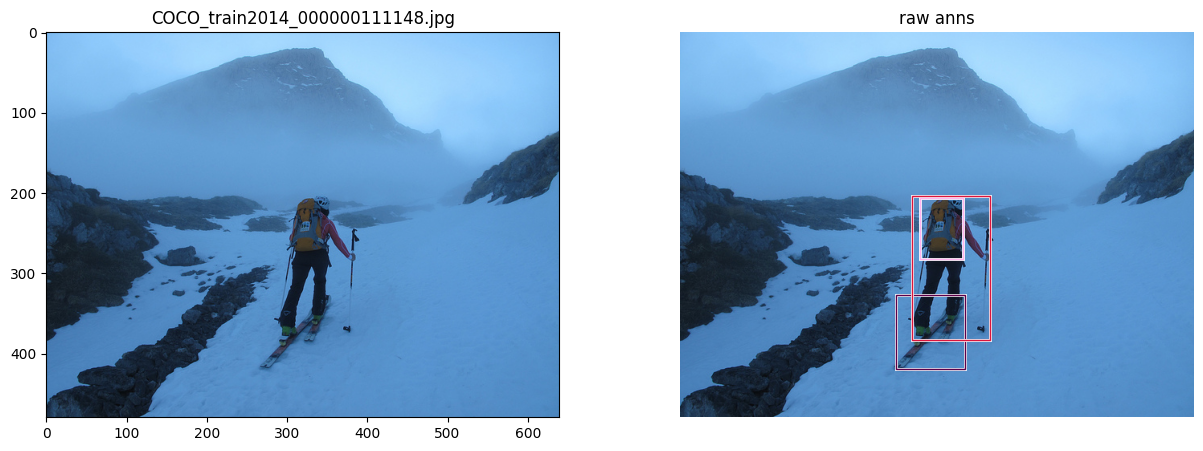

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[1].imshow(image)
watch(train_ins_anns, axs[1], ins_categories, title='raw anns', with_name=False)  # 

backpack


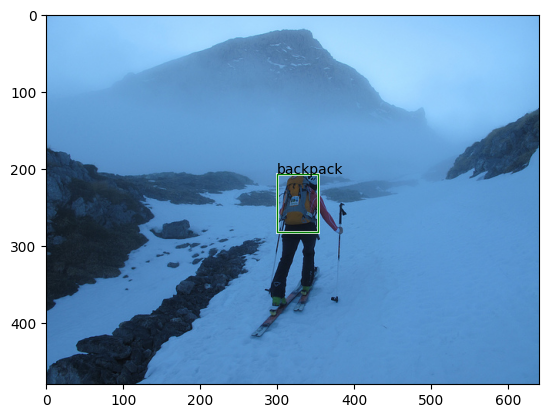

In [45]:
fig, ax = plt.subplots()
ax.imshow(image)
ann = train_ins_anns[1]
info = ins_categories[ann['category_id']]
print(info['name'])
show_box(ann['bbox'], ax, info=info)

In [18]:
ins_categories[19]

{'supercategory': 'animal', 'id': 19, 'name': 'horse'}

In [19]:
pprint(train_ins_anns, width=100, compact=True, sort_dicts=False)

[{'segmentation': [[354.75, 332.48, 347.71, 356.89, 331.28, 389.76, 321.89, 384.6, 325.17, 375.68,
                    333.16, 363.0, 336.91, 354.55, 343.02, 341.4, 347.71, 329.19, 353.81, 326.85,
                    354.75, 331.07],
                   [333.16, 361.59, 304.05, 389.76, 279.63, 418.87, 268.83, 416.52, 270.24, 410.89,
                    291.84, 389.29, 303.58, 377.08, 312.5, 368.63, 319.07, 359.71, 331.28,
                    353.61]],
  'area': 1494.7825999999995,
  'iscrowd': 0,
  'image_id': 111148,
  'bbox': [268.83, 326.85, 85.92, 92.02],
  'category_id': 35,
  'id': 609100},
 {'segmentation': [[310.19, 224.28, 307.64, 231.93, 306.18, 237.03, 306.54, 245.77, 306.18, 251.96,
                    303.27, 254.87, 302.54, 258.52, 303.63, 262.16, 299.99, 267.98, 298.9, 271.99,
                    303.63, 273.45, 306.91, 270.53, 307.27, 273.45, 303.63, 277.45, 305.09, 279.27,
                    307.27, 281.82, 308.73, 280.37, 310.19, 275.63, 318.2, 274.54, 329.49, 272.35,

In [21]:
rel_categories[27]

{'id': 27, 'name': 'point instr'}

In [22]:
pprint(train_rel_anns, width=100, compact=True, sort_dicts=False)

[{'id': 3734, 'subject_id': 1711417, 'object_id': 1165835, 'category_id': 1, 'image_id': 111148},
 {'id': 16546, 'subject_id': 1711417, 'object_id': 609100, 'category_id': 21, 'image_id': 111148}]


### test

In [8]:
test_img_ids = coco_ins_test.getImgIds()

In [9]:
img_id = 564
# img_id = test_img_ids[1000]
img_info = coco_ins_test.loadImgs(img_id)[0]
test_image = plt.imread(os.path.join(test_img_root, img_info['file_name']))

test_ins_anns = coco_ins_test.imgToAnns[img_id]
test_rel_anns = coco_rel_test.imgToAnns[img_id]

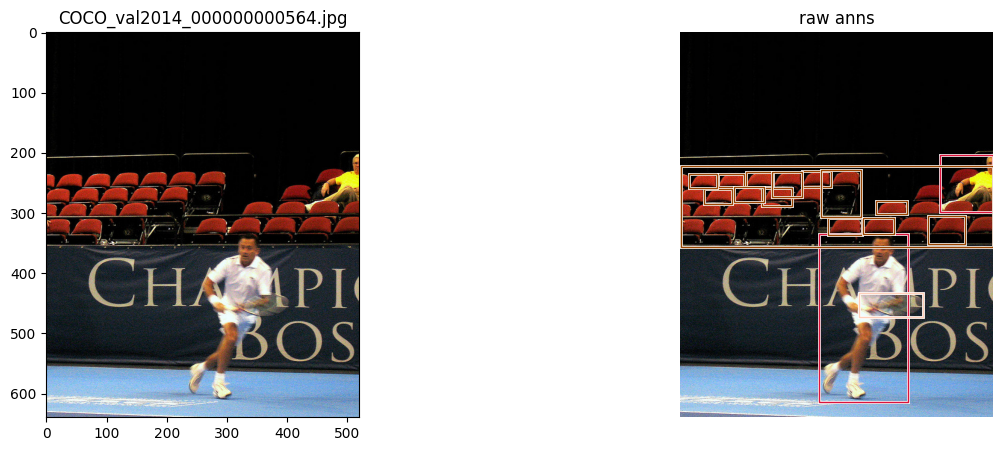

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(test_image)
axs[0].set_title(img_info['file_name'])
axs[1].imshow(test_image)
watch(test_ins_anns, axs[1], ins_categories, title='raw anns', with_name=False)  # 

In [26]:
ins_categories[19]

{'supercategory': 'animal', 'id': 19, 'name': 'horse'}

In [13]:
pprint([{k: v for k, v in item.items() if k != 'segmentation'} for item in test_ins_anns], 
       width=200, compact=True, sort_dicts=False)

[{'area': 3573.3858000000005, 'iscrowd': 0, 'image_id': 428, 'bbox': [374.56, 200.49, 94.65, 154.52], 'category_id': 32, 'id': 293908},
 {'area': 55007.08139999999, 'iscrowd': 0, 'image_id': 428, 'bbox': [226.94, 32.65, 355.92, 323.27], 'category_id': 1, 'id': 487626},
 {'area': 15955.590150000004, 'iscrowd': 0, 'image_id': 428, 'bbox': [405.41, 234.73, 175.13, 121.62], 'category_id': 61, 'id': 1085469}]


chair


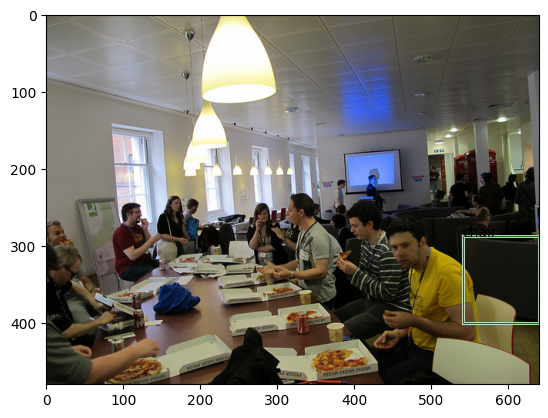

In [55]:
fig, ax = plt.subplots()
ax.imshow(test_image)
ann = test_ins_anns[33]
info = ins_categories[ann['category_id']]
print(info['name'])
show_box(ann['bbox'], ax, info=info)

In [22]:
rel_categories[1]

{'id': 1, 'name': 'hold obj'}

In [15]:
pprint(test_rel_anns, width=100, compact=True, sort_dicts=False)

[{'id': 1948, 'subject_id': 487626, 'object_id': -1, 'category_id': 1, 'image_id': 428},
 {'id': 10722, 'subject_id': 487626, 'object_id': 1085469, 'category_id': 9, 'image_id': 428},
 {'id': 10723, 'subject_id': 487626, 'object_id': -1, 'category_id': 10, 'image_id': 428}]


## proposals

In [11]:
def preds2anns(preds):
    return [
        {
            'bbox': box_xyxy2xywh(bbox),
            'score': score,
            'category_id': ins_label2cat[label]
        }
        for bbox, score, label in zip(preds['bboxes'], preds['scores'], preds['labels'])
    ]

### train

In [20]:
train_img_ids = coco_ins_train.getImgIds()

#### upt

In [18]:
proposals_train = load('../../proposals/UPT/proposal_upt_train.pkl')

In [22]:
# img_id = 111148  # 
img_id = train_img_ids[1000]
print(img_id)
img_info = coco_ins_train.loadImgs(img_id)[0]
image = plt.imread(os.path.join(train_img_root, img_info['file_name']))

111148


In [23]:
preds_train = proposals_train[img_info['file_name']]
preds_train_ins = preds_train['instances']
preds_train_pose = preds_train['person_keypoints']

In [24]:
preds_train_ins

{'bboxes': array([[289., 205.,  96., 180.],
        [270., 326.,  89.,  92.],
        [303., 206.,  48.,  72.]], dtype=float32),
 'scores': array([0.999, 0.996, 0.985], dtype=float32),
 'labels': array([ 0, 30, 24]),
 'ids': [0, 1, 2]}

In [31]:
score_5 = preds_train_ins['scores'] > 0.5
preds_train_ins_5 = {key: value[score_5] for key, value in preds_train_ins.items()}
score_2 = preds_train_ins['scores'] > 0.2
preds_train_ins_2 = {key: value[score_2] for key, value in preds_train_ins.items()}

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[0].axis('off')
axs[1].imshow(image)
axs[2].imshow(image)
watch(coco_ins_train.imgToAnns[img_id], axs[1], ins_categories, title='anns', with_name=False)  # 
watch(preds2anns(preds_train_ins_2), axs[2], ins_categories, title='proposal', with_name=False)  # 

### test

In [ ]:
test_img_ids = coco_ins_test.getImgIds()

In [12]:
proposals_test = load('../../proposals/UPT/proposal_upt_test.pkl')

In [28]:
test_img_id = 564  # 
# test_img_id = test_img_ids[1000]
img_info = coco_ins_test.loadImgs(test_img_id)[0]
image = plt.imread(os.path.join(test_img_root, img_info['file_name']))

In [29]:
preds_test = proposals_test[img_info['file_name']]
preds_test_ins  = preds_test['instances']
preds_test_pose = preds_test['person_keypoints']

In [30]:
preds_test_ins

{'bboxes': array([[236., 329., 145., 280.],
        [303., 433., 100.,  43.],
        [247., 388.,  35.,  69.],
        [436., 202.,  84.,  92.],
        [276., 418., 125.,  58.],
        [307., 394.,  90.,  81.]], dtype=float32),
 'scores': array([0.999, 0.983, 0.85 , 0.383, 0.292, 0.269], dtype=float32),
 'labels': array([ 0, 38, 38,  0, 38, 38]),
 'ids': [0, 1, 2, 3, 4, 5]}

In [31]:
score_5 = preds_test_ins['scores'] > 0.5
preds_test_ins_5 = {key: np.array(value)[score_5] for key, value in preds_test_ins.items()}
score_2 = preds_test_ins['scores'] > 0.2
preds_test_ins_2 = {key: np.array(value)[score_2] for key, value in preds_test_ins.items()}

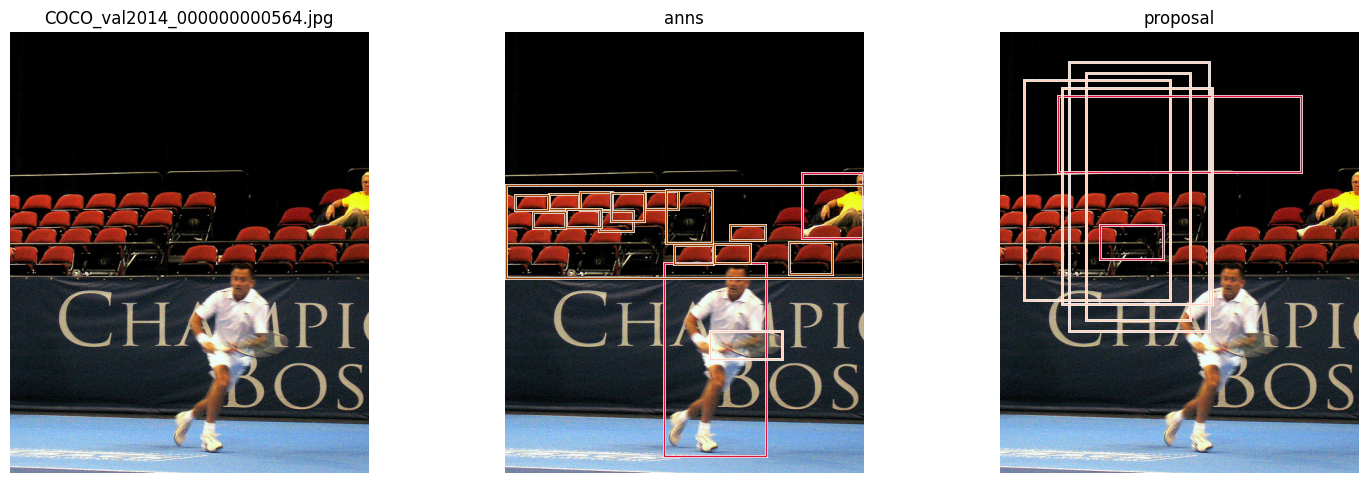

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[0].axis('off')
axs[1].imshow(image)
axs[2].imshow(image)
watch(coco_ins_test.imgToAnns[test_img_id], axs[1], ins_categories, title='anns', with_name=False)  # 
watch(preds2anns(preds_test_ins_2), axs[2], ins_categories, title='proposal', with_name=False)  # 